<a href="https://colab.research.google.com/github/renevaldez/ReneValdez_RepositorioInteligenciaArtificial/blob/main/AF7_Redes_Neuronales_Artificiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


AF7: Redes Neuronales Artificiales

*   Jonathan Gael Posada Licón
*   Juan Emiliano Morales Silva
*   Rene Gutierrez Valdez
*   Guillermo Rodríguez González
*   Andres Suárez Galván











In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

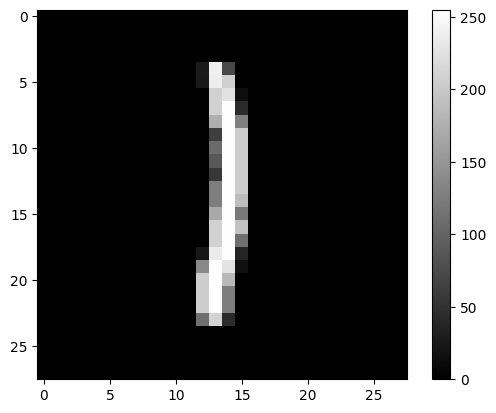

In [ ]:
plt.figure()
plt.imshow(train_images[72], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

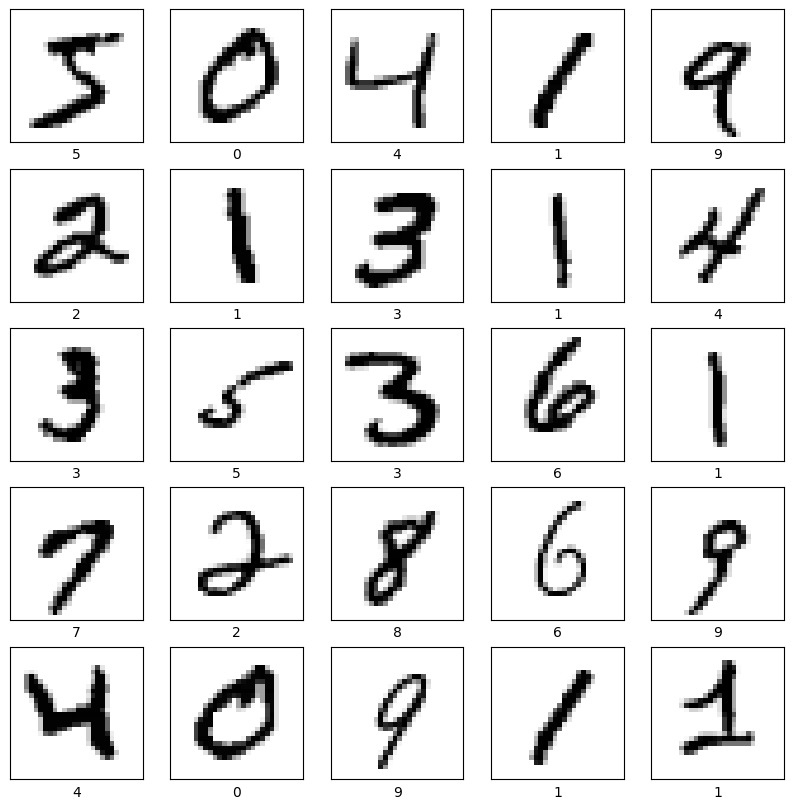

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8780 - loss: 0.4295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9644 - loss: 0.1237
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9758 - loss: 0.0806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0605
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0451
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0336
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9917 - loss: 0.0276
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0223
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9949 - loss: 0.0177
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0144


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9742 - loss: 0.0951

Test accuracy: 0.9742000102996826


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predictions[0]

array([5.79359835e-07, 3.21598370e-09, 6.11457494e-07, 7.59581686e-04,
       1.03726215e-14, 3.03408271e-10, 8.78055370e-16, 9.99238610e-01,
       1.83123149e-07, 3.67569157e-07], dtype=float32)

In [ ]:
predictions[132]

array([1.7281115e-17, 6.2529745e-13, 2.3052064e-10, 1.0166370e-06,
       2.4954982e-23, 9.9999887e-01, 3.8355855e-13, 1.2248872e-16,
       1.2701029e-12, 2.8125200e-12], dtype=float32)

In [ ]:
predictions[10]

array([9.9999934e-01, 1.1410178e-12, 5.9662642e-07, 7.9939105e-10,
       1.1906279e-13, 2.1805585e-10, 1.3523201e-08, 2.0430313e-08,
       1.6392531e-12, 1.7254968e-10], dtype=float32)

In [ ]:
predictions[777]

array([3.8310940e-13, 9.9994487e-01, 4.8383964e-09, 2.7715318e-05,
       2.6279879e-05, 5.0181546e-11, 2.5624995e-11, 8.8025513e-07,
       4.9181274e-08, 1.4402498e-08], dtype=float32)

In [ ]:
predictions[560]

array([1.4141210e-10, 3.2693976e-08, 1.9307757e-08, 2.8471262e-05,
       9.3738090e-05, 2.9350331e-11, 1.5238040e-09, 1.2235771e-04,
       1.2504110e-07, 9.9975526e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

np.int64(7)

In [ ]:
test_labels[0]

NameError: name 'test_labels' is not defined

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

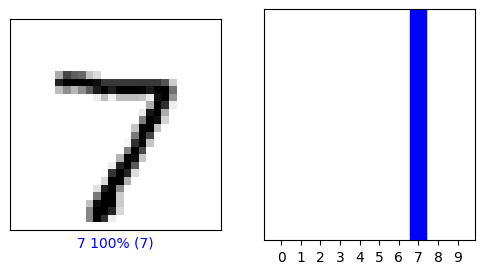

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

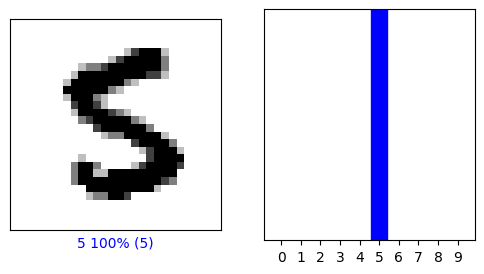

In [ ]:
i = 132
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

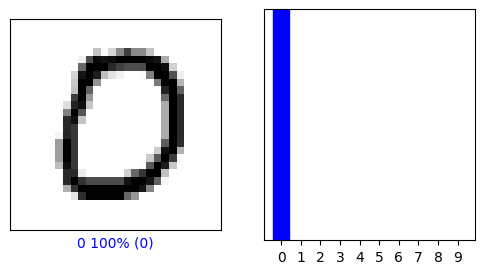

In [ ]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

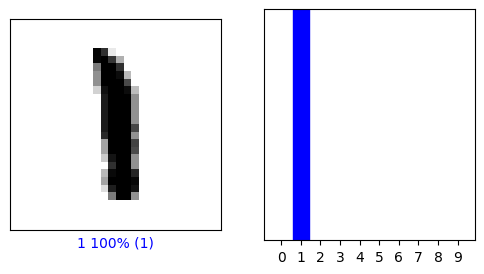

In [ ]:
i = 777
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

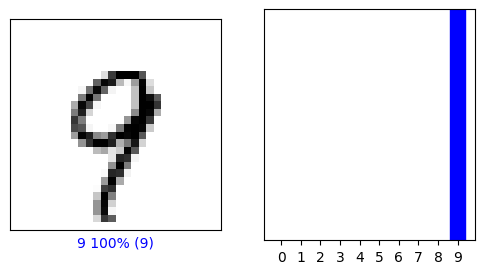

In [ ]:
i = 560
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

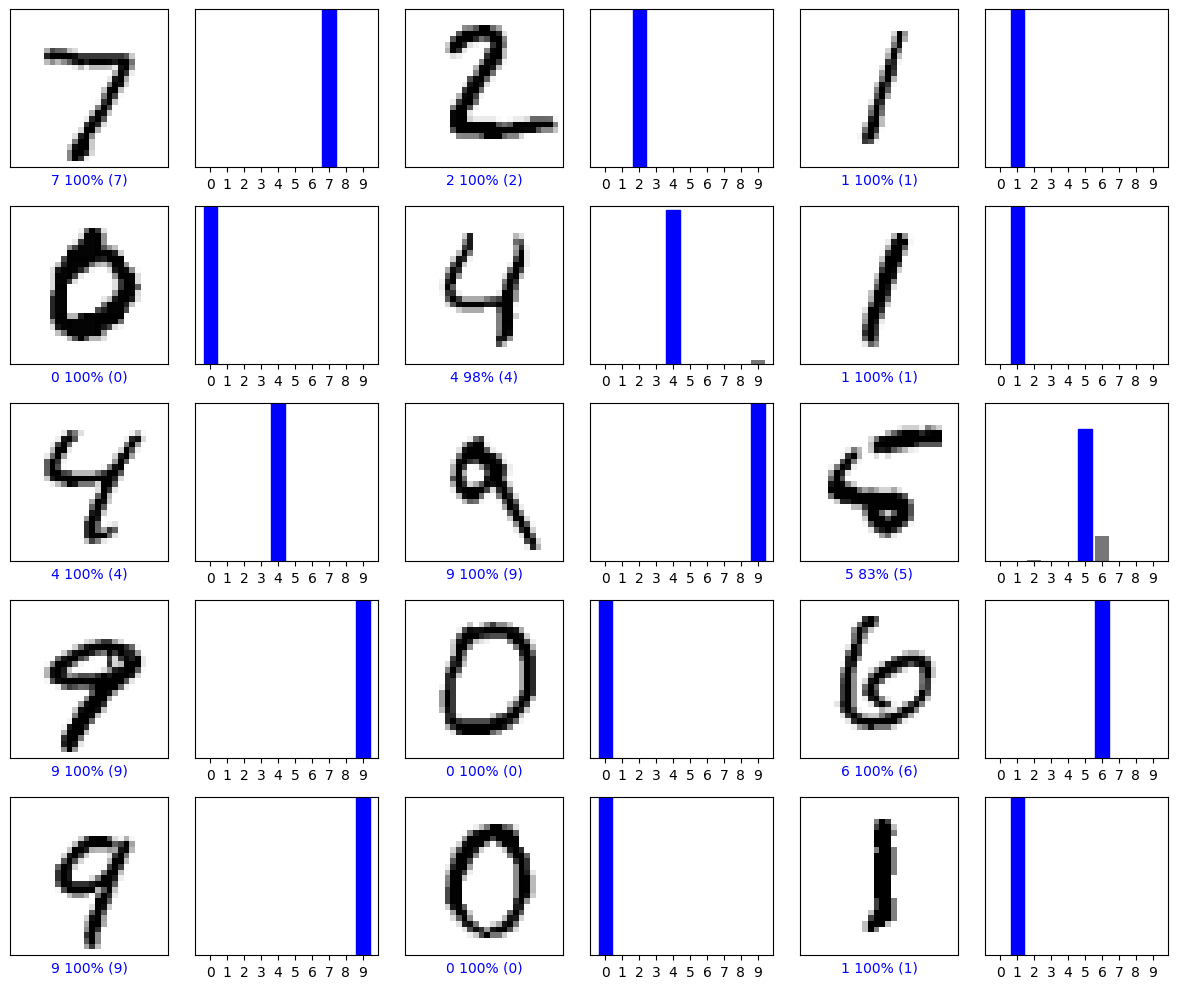

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[3.5677274e-11 1.6605323e-09 9.9999976e-01 2.7167633e-07 9.2700134e-20
  1.5531882e-14 5.3043458e-13 5.9507998e-18 1.6642793e-10 6.1053423e-18]]


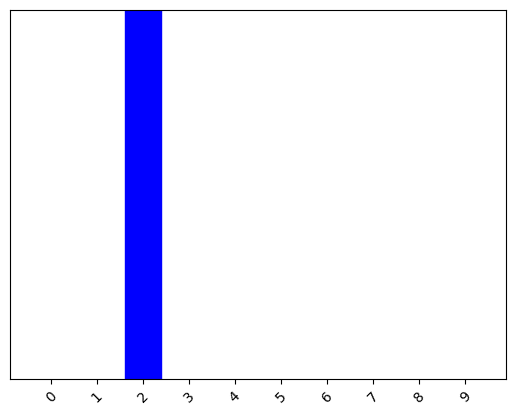

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

np.int64(2)